In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing important libraries.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Recommendation Model


Importing clean dataset file formed at the end of data cleaning notebook.

In [76]:
df = pd.read_csv("/content/drive/MyDrive/clean_data.csv")

In [77]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,budget,genres,homepage,id,keywords,language,original_title,overview,...,tagline,title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,0,0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,1,1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,2,2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,Français,Spectre,A cryptic message from Bond’s past sends him o...,...,A Plan No One Escapes,Spectre,6.3,4466,2015.0,United Kingdom,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,3,3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,...,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,United States of America,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,4,4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",...,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,United States of America,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe
5,5,5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,English,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,...,The battle within.,Spider-Man 3,5.9,3576,2007.0,United States of America,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church
6,6,6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,English,Tangled,When the kingdom's most wanted-and most charmi...,...,They're taking adventure to new lengths.,Tangled,7.4,3330,2010.0,United States of America,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman
7,7,7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,English,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767,2015.0,United States of America,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans
8,8,8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,English,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",...,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293,2009.0,United Kingdom,David Yates,Rupert Grint,Emma Watson,Tom Felton
9,9,9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,English,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,...,Justice or revenge,Batman v Superman: Dawn of Justice,5.7,7004,2016.0,United States of America,Zack Snyder,Henry Cavill,Gal Gadot,Amy Adams


In [78]:
vote_average = df['vote_average'].mean()
print(vote_average)

6.092171559442011


In [79]:
num_of_votes = df['num_voted_users'].quantile(0.90)
print(num_of_votes)

1838.4000000000015


In [80]:
new_movies = df.copy().loc[df['num_voted_users'] >= num_of_votes]
new_movies.shape

(481, 28)

In [81]:
print("Original Shape of Dataset: {}".format(df.shape))
print("Shape of Dataset with Movies greater than {:.2f} vote counts: {}".format(num_of_votes, new_movies.shape))

Original Shape of Dataset: (4803, 28)
Shape of Dataset with Movies greater than 1838.40 vote counts: (481, 28)


In [82]:
def rating_weighted(dff, vote_average = vote_average, num_of_votes = num_of_votes):
  count = dff['num_voted_users']
  avg = dff['vote_average']

  #Calculation based on the Weighted Average Formula
  cal = (count/(count + num_of_votes) * avg) + (num_of_votes/(count + num_of_votes) * vote_average)
  return cal

In [83]:
new_movies['score'] = new_movies.apply(rating_weighted, axis = 1)

In [92]:
wvg = new_movies.sort_values('score', ascending = False)
wvg[['title', 'num_voted_users', 'vote_average', 'score']].head(20)

,title,num_voted_users,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


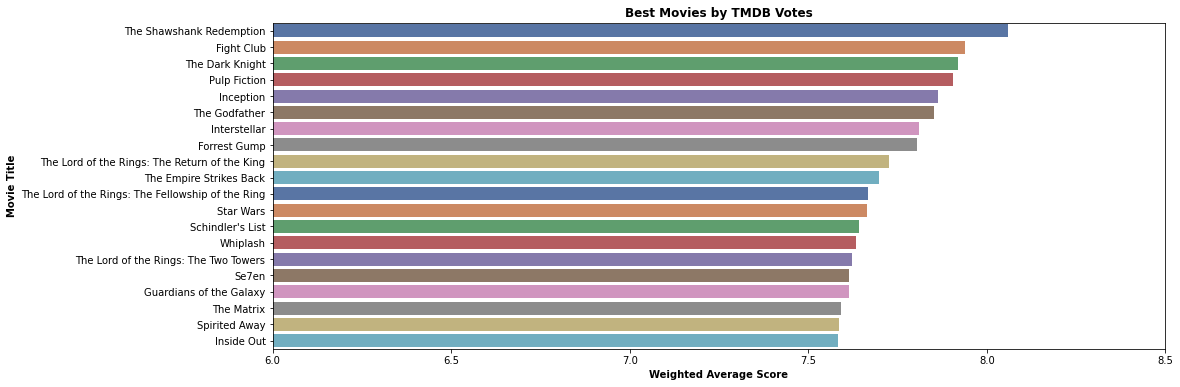

In [93]:
plt.figure(figsize = (16, 6))

axis = sns.barplot(x = wvg['score'].head(20), y = wvg['title'].head(20), data = wvg, palette = 'deep')

plt.xlim(6, 8.5)
plt.title('Best Movies by TMDB Votes', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

plt.savefig('best_movies.png')

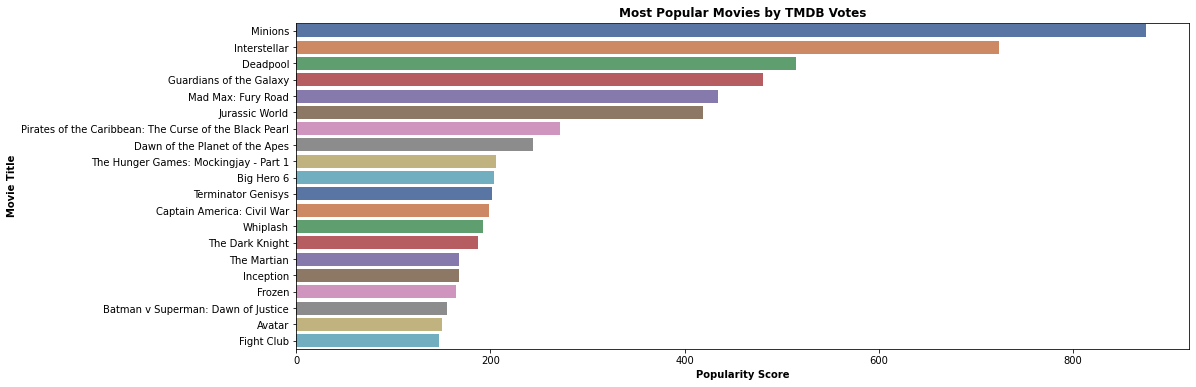

In [103]:
popularity = new_movies.sort_values('popularity', ascending = False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x = popularity['popularity'].head(20), y = popularity['original_title'].head(20), data = popularity, palette = 'deep')

plt.title('Most Popular Movies by TMDB Votes', weight='bold')
plt.xlabel('Popularity Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

plt.savefig('popular_movies.png')

In [101]:
scaler = preprocessing.MinMaxScaler()
scaled_movies = scaler.fit_transform(new_movies[['score', 'popularity']])
norm = pd.DataFrame(scaled_movies, columns = ['score', 'popularity'])

new_movies[['norm score', 'norm popularity']] = norm

new_movies['Recommendation Score'] = new_movies['norm score'] * 0.5 + new_movies['norm popularity'] * 0.5
sc = new_movies.sort_values('Recommendation Score', ascending = False)
sc[['title', 'norm score', 'norm popularity', 'Recommendation Score']].head(10)

,title,norm score,norm popularity,Recommendation Score
6,Tangled,0.913974,0.826794,0.870384
355,Die Hard: With a Vengeance,0.398128,1.000000,0.699064
16,The Avengers,0.846307,0.548503,0.697405
2,Spectre,0.952045,0.212268,0.582157
0,Avatar,1.000000,0.154384,0.577192
1,Pirates of the Caribbean: At World's End,0.958670,0.165840,0.562255
4,John Carter,0.932490,0.189676,0.561083
5,Spider-Man 3,0.928356,0.162295,0.545325
3,The Dark Knight Rises,0.946750,0.136890,0.541820
13,The Lone Ranger,0.853462,0.218227,0.535844


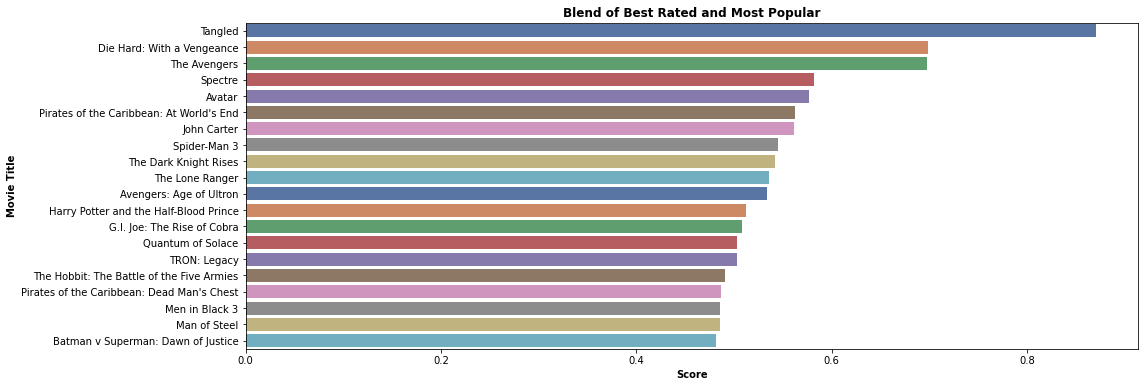

In [104]:
plt.figure(figsize=(16,6))

axis = sns.barplot(x = sc['Recommendation Score'].head(20), y = sc['title'].head(20), data = sc, palette = 'deep')

plt.title('Blend of Best Rated and Most Popular', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

plt.savefig('recommended_movies.png')